# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

In [85]:
print('https://docs.google.com/document/d/1cz402LQp7P0la2HGh48cBgzC0f5eCQJ2HODpRdK9ltU/edit?usp=sharing')


https://docs.google.com/document/d/1cz402LQp7P0la2HGh48cBgzC0f5eCQJ2HODpRdK9ltU/edit?usp=sharing


In [86]:
import numpy as np
import pandas as pd

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [87]:
! git clone https://github.com/Shruti-Elango/assignment2.DS3003


fatal: destination path 'assignment2.DS3003' already exists and is not an empty directory.


In [88]:
#Numeric variable: For ./data/airbnb_hw.csv, clean the Price variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
df = pd.read_csv('./assignment2.DS3003/data/airbnb_hw.csv')
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables; `object` is a bad sign
#print(df.columns[1:12], '\n') # First five column names
print(df.loc[1:5,("Host Id",'Price')],'\n')

var = 'Price'
df[var].str.replace(",",'')

print(df[var].unique(),'\n') # 'n' is not listed in the codebook
print(df[var].value_counts(), '\n')
df[var] = pd.to_numeric(df[var], errors='coerce')
print('Had to get rid of the seperators for the price units')
df.to_csv('airbnb_clean.csv')
#print(df.loc[30475:30477,('Price')],'\n')
print(df.dtypes, '\n')

df[var] = pd.to_numeric(df[var], errors='coerce')

df = df.rename(columns = {'Beds':'Number of Total Beds'})

list = ['Review Scores Rating (bin)']
new_df = df.filter(list) # Keep only the variables on the list
print( new_df.columns, '\n', new_df.shape, '\n')
new_df = df.drop(list,axis=1) # Drop only the variables on the list
print( new_df.columns, '\n', new_df.shape)

#there was an extra Review column that was not up to date

df.to_csv('airbnb_clean.csv')
#got rid of the seperators so that the numbers that were abover 999 were classified as integers instead of objects

(30478, 13) 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 

    Host Id Price
1  33134899    37
2  39608626    28
3       500   199
4       500   549
5      1039   149 

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 

In [89]:
#Categorical variable: For the ./data/sharks.csv data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
df = pd.read_csv('./assignment2.DS3003/data/sharks.csv')
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables; `object` is a bad sign
#print(df.columns[1:12], '\n') # First five column names
print(df.loc[1:5,("index",'Type')],'\n')

var = 'Type'
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')

df[var].str.replace('Sea Disaster', 'Provoked')
df[var].str.replace('Watercraft', 'Provoked')
df[var].str.replace('Boat', 'Provoked')
df[var].str.replace('Boating', 'Provoked')
df[var].str.replace('Questionable' , 'Invalid')
df[var].str.replace('Unconfirmed', 'Invalid')
df[var].str.replace('Unverified', 'Invalid')
df[var].str.replace('Under investigation', 'Invalid')
df[var].str.replace('Boatomg', 'Provoked')
df.to_csv('sharks_clean.csv')
#Cleaned the Type varible so that it only contains provoked and unproked as well as invalu to allow for 3 subcategories instead of the multiple that were seen and "dirty"


<ipython-input-89-2e108a10c8c5>:2: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./assignment2.DS3003/data/sharks.csv')


(6462, 257) 

index             int64
Case Number      object
Date             object
Year            float64
Type             object
                 ...   
Unnamed: 251    float64
Unnamed: 252    float64
Unnamed: 253    float64
Unnamed: 254    float64
Unnamed: 255    float64
Length: 257, dtype: object 

   index        Type
1      1    Provoked
2      2  Unprovoked
3      3  Unprovoked
4      4  Unprovoked
5      5  Unprovoked 

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64 



In [90]:
#Dummy variable: For the pretrial data covered in the lecture, clean the WhetherDefendantWasReleasedPretrial variable as well as you can, and, in particular, replace missing values with np.nan.
#! git clone https://www.github.com/DS3001/wrangling
#df = pd.read_csv('./data/VirginiaPretrialData2017.csv',low_memory=False)
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)
f = df.rename(columns = {'WhetherDefendantWasReleasedPretrial':'Released Pretrial'})
var = 'Released Pretrial' # A dummy variable
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')
df[var].isnull(np.nan)





KeyboardInterrupt: ignored

In [ ]:
#Missing values, not at random: For the pretrial data covered in the lecture, clean the ImposedSentenceAllChargeInContactEvent variable as well as you can, and explain the choices you make. (Hint: Look at the SentenceTypeAllChargesAtConvictionInContactEvent variable.)
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)



**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [ ]:
#1,2,3
df = pd.read_csv('./assignment2.DS3003/data/college_completion.csv')
df.head()  #5X63 and there are 5 observations and 63 variables
print(df.loc[1:15,('control','level')],'\n') #The control lists the type of colledf['sex'] = df['Defendant_Sex'] # Categorical variable example
var = 'grad_100_value'
print(df[var].unique(),'\n')
print(df[var].value_counts(), '\n')




In [ ]:
#4
print(df[var].hist(), '\n') #histogram



In [ ]:
#4
print(df[var].plot.density() )#kernel density plot

In [ ]:
#4
df.boxplot(column = 'grad_100_value') #boxplot
#there seems to be a grad_100_value of the majority of the numbers sitting close and around 0. There are a lot of higher outliers seen in the boxplot and the median sits lower than the entire range.

In [ ]:
#5. For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control.
#Which institutions appear to have the best graduation rates?
group_by = 'level'
var = 'grad_100_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()

df_wide.loc[:,['4-year','2-year']].plot.density()

var = 'grad_100_value'
group = 'level'
df.loc[:,[group,var]].groupby(group).describe()
#2- year institutions have the best graduation rates


In [ ]:
#6. Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control.
df['levelXcontrol']=df['level']+df['control']
#Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
group_by = 'levelXcontrol'
var = 'grad_100_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
#2 year public

In [ ]:
#7. Make a kernel density plot of aid_value. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values.
# Now group your graph by level and control. What explains the bi-modal nature of the graph?
#Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.
var='aid_value'
print(df[var].plot.density() )

group_by = 'level', 'control'
var = 'aid_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
# the bimodal of the graph is represented by differing amounts of financial aid needed at two main points
df.loc[:,[group,var]].groupby(group).describe()


In [ ]:
#8. Make a scatterplot of grad_100_value by aid_value. Describe what you see.
#Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?
df.plot.scatter(y='grad_100_value',x='aid_value')
df.plot.scatter(y='grad_100_value',x='control')
df.plot.scatter(y='grad_100_value',x='level')

df.plot.hexbin(y='grad_100_value',x='aid_value')
#aid seem to increase graduation rates for private for profit institutions where they need a lot more aid in order to graduate
#The more people need more aid the higher the grad_100_value is

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [95]:
#1, 2, 3
df = pd.read_csv('./assignment2.DS3003/data/airbnb_hw.csv')
df.head()
print(df.loc[1:15,('Room Type','Property Type')],'\n')


          Room Type Property Type
1      Private room     Apartment
2      Private room     Apartment
3   Entire home/apt     Apartment
4      Private room     Apartment
5   Entire home/apt     Apartment
6   Entire home/apt     Apartment
7      Private room     Apartment
8   Entire home/apt     Apartment
9   Entire home/apt     Apartment
10  Entire home/apt     Apartment
11     Private room     Apartment
12     Private room     Apartment
13     Private room         House
14  Entire home/apt     Apartment
15     Private room     Apartment 



Axes(0.125,0.11;0.775x0.77) 



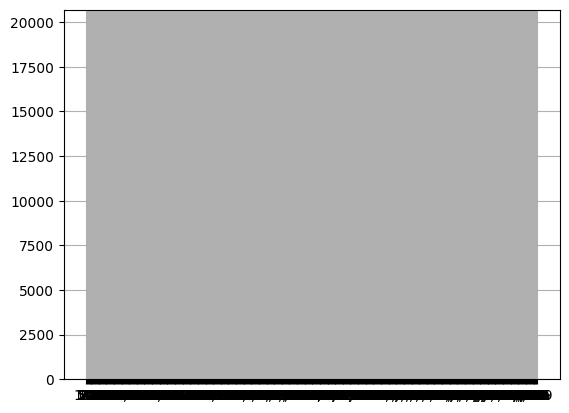

In [96]:
#4
var='Price'
print(df[var].hist(), '\n') #histogram

In [ ]:
#4
var='Price'
print(df[var].plot.density() )#kernel density plot

In [ ]:
#4
df.boxplot(column = 'Price') #boxplot



In [ ]:
#4
descr = df['Price'].describe() # Save the description as an object
print(descr,'\n')

# Computing the Variance:
std = descr[2] # Accessing the standard deviation from the description object
var = std**2
print('Variance: ', var,'\n')

# Computing the IQR:
thirdQ = descr[6] # Getting the 75% percentile
firstQ = descr[4] # Getting the 25% percentile
IQR = thirdQ - firstQ # Computing the IQR
print('IQR: ', IQR)

In [ ]:
#4  Use log to transform price into a new variable, price_log, and take these steps again.
df['price_log'] = np.log(df['Price'])

var='price_log'
print(df[var].hist(), '\n') #histogram

descr = df['price_log'].describe() # Save the description as an object
print(descr,'\n')

# Computing the Variance:
std = descr[2] # Accessing the standard deviation from the description object
var = std**2
print('Variance: ', var,'\n')

# Computing the IQR:
thirdQ = descr[6] # Getting the 75% percentile
firstQ = descr[4] # Getting the 25% percentile
IQR = thirdQ - firstQ # Computing the IQR
print('IQR: ', IQR)

In [ ]:
var='price_log'
print(df[var].plot.density() )#kernel density plot

In [ ]:
df.boxplot(column = 'price_log') #boxplot


In [ ]:
#5 Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds.
#Describe any patterns you see in the average price and standard deviation in prices
var = 'Beds'
df[var] = pd.to_numeric(df[var], errors='coerce') # Coerce the variable to numeric

print(df[var].describe(),'\n')

df.plot.scatter(y='Beds',x='price_log')

df.plot.hexbin(y='price_log',x='Beds')

group_by = 'Beds'
var = 'price_log'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()

var = 'price_log'
group = 'Beds'
df.loc[:,[group,var]].groupby(group).describe()


In [ ]:
#6 Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type.
#What patterns do you see? Compute a description of Price conditional on Room Type and Property Type.
#Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation?
#Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
df.plot.scatter(y='price_log',x='Beds')
df_wide.loc[:,['Room Type','Property Type']].plot.density()
print(df['bond'].describe(), '\n')

descr = df['Room_Type'].describe() # Save the description as an object
print(descr,'\n')

# Computing the Variance:
std = descr[2] # Accessing the standard deviation from the description object
var = std**2
print('Variance: ', var,'\n')

# Computing the IQR:
thirdQ = descr[6] # Getting the 75% percentile
firstQ = descr[4] # Getting the 25% percentile
IQR = thirdQ - firstQ # Computing the IQR
print('IQR: ', IQR)

descr = df['Property Type'].describe() # Save the description as an object
print(descr,'\n')

# Computing the Variance:
std = descr[2] # Accessing the standard deviation from the description object
var = std**2
print('Variance: ', var,'\n')

# Computing the IQR:
thirdQ = descr[6] # Getting the 75% percentile
firstQ = descr[4] # Getting the 25% percentile
IQR = thirdQ - firstQ # Computing the IQR
print('IQR: ', IQR)


#The mean is the most frequently used measure of central tendency because it uses all values in the data set to give you an average.
#For data from skewed distributions, the median is better than the mean because it isn't influenced by extremely large values.

In [ ]:
#7 We've looked a bit at this price_log and Beds scatterplot. Use seaborn to make a jointplot with kind=hex.
# Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

import numpy as np
import pandas as pd
import seaborn as sns

def pn(x):
    print(x,'\n')
    return
from sklearn.neighbors import KNeighborsRegressor as kNNRegression
y = df['Beds'] # Create target variable vector
X = df.loc[:,['price_log']] # Create feature matrix
pn(X.head())
pn(X.describe())

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X to get U:
X = X.apply(maxmin)
pn(X.head())
pn(X.describe())

# Fit the model:
k=3
model = kNNRegression(n_neighbors=k) # Create a sk model for k=3
fitted_model = model.fit(X,y)

N_x = 100 # Coarseness of x variable
N_y = 100 # Coarseness of y variable
total = N_x*N_y # Total number of points to plot

grid_x = np.linspace(0,1,N_x) # Create a grid of x values
grid_y = np.linspace(0,1,N_y) # Create a grid of y values

xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
X = xs.reshape(total) # Turns pairs into vectors
Y = ys.reshape(total) # Turns pairs into vectors


x_hat = pd.DataFrame({'price_log':X,'Beds':Y}) # Create a dataframe of points to plot
y_hat = fitted_model.predict(x_hat) # Fit the model to the points
x_hat['Predicted'] = y_hat # Add new variable to the dataframe

this_plot = sns.scatterplot(data=x_hat,x='price_log',y='Beds',hue='Predicted') # Create seaborn plot
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

In [ ]:
print('https://docs.google.com/document/d/1cz402LQp7P0la2HGh48cBgzC0f5eCQJ2HODpRdK9ltU/edit?usp=sharing')


**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

In [98]:
import numpy as np
import pandas as pd





In [99]:
! git clone https://github.com/Shruti-Elango/assignment2.DS3003


fatal: destination path 'assignment2.DS3003' already exists and is not an empty directory.


In [100]:
df = pd.read_csv('./assignment2.DS3003/data/Distribution-of-Tax-Burden-Current-Law-2019.csv')
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables; `object` is a bad sign
print(df.columns[0:12], '\n') # First five column names

FileNotFoundError: ignored

In [ ]:
var= 'individual income taxes'
print(df[var, 'income decile'].hist())
var ='Total Federal Taxes'
print(df[var, 'income decile'].hist())

In [ ]:
#4 Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes.
# How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
group_by = 'Individual Income Taxes', 'Payroll Taxes', 'Excises and Customs Duties', 'Estate and Gift Taxes'
var = 'Total Federal Taxes'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()

df_wide.loc[:,['Individual Income Taxes', 'Payroll Taxes', 'Excises and Customs Duties', 'Estate and Gift Taxes']].plot.hist()



# 5 Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families.
#Plot this alongside the bars for the deciles above the Total line. Describe your results.



In [ ]:
#       A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals,
#       and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
#The U.S. has a progressive income tax system that taxes higher-income individuals more heavily than lower-income individuals. Though the top 1 percent of taxpayers earn
#19.7 percent of total adjusted gross income, they pay 37.3 percent of all income taxes. (taxfoundatation.org)
#       Do the rich pay enough in taxes? Defend your answer.
# According to CBS News The highest-earning Americans pay the most in combined federal, state and local taxes, the Tax Foundation noted. As a group, the top quintile
# — those earning $130,001 or more annually — paid $3.23 trillion in taxes, compared with $142 billion for the bottom quintile, or those earning less than $25,000.
